## introduction:
Welcome to the Bike-Share Analysis Case Study! In this case study, I will be performing several real world tasks

### Scenario:
I am  data analyst working in the marketing analyst team at Cyclistic, a bike-share company in Chicago.
The director of marketing believes the company’s future success depends on maximizing the number of annual memberships. Therefore, my team wants to understand how casual riders and annual members use Cyclistic bikes differently. From these insights, my team will design a new marketing strategy to convert casual riders into annual members. But first, Cyclistic executives must approve my  recommendations, so they must be backed up with compelling data insights and professional data visualizations.




### about the company and the case study:
Cyclistics: bike-share program that features more than 5,800 bicycles and 600 docking stations
In 2016, Cyclistic launched a successful bike-share offering. Since then, the program has grown to a fleet of 5,824 bicycles

Until now, Cyclistic’s marketing strategy relied on building general awareness and appealing to broad consumer segments.
One approach that helped make these things possible was the flexibility of its pricing plans: single-ride passes, full-day passes, and annual memberships. Customers who purchase single-ride or full-day passes are referred to as casual riders. Customers who purchase annual memberships are Cyclistic members.

Cyclistic’s finance analysts have concluded that annual members are much more profitable than casual riders. Although the pricing flexibility helps Cyclistic attract more customers, Moreno -The director of marketing and my manager- believes that maximizing the number of annual members will be key to future growth. Rather than creating a marketing campaign that targets all new customers, Moreno believes there is a very good chance to convert casual riders into members.


Moreno has set a clear goal: Design marketing strategies aimed at converting casual riders into annual members. In order to do that, however, the marketing analyst team needs to better understand how annual members and casual riders differ, why casual riders would buy a membership, and how digital media could affect their marketing tactics. Moreno and her team are interested in analyzing the Cyclistic historical bike trip data to identify trends.


## The question:

Moreno has assigned me the first question to answer: How do annual members and casual riders use Cyclistic bikes differently?

In [3]:
import pandas as pd 
import datetime
import matplotlib.pyplot as plt
import numpy as np
from dateutil.relativedelta import relativedelta

In [4]:
#readign the data file
cyclistics_df=pd.read_csv('C:/Users/ahmad/OneDrive/Desktop/google data analysis/google project/cyclistics_data.csv')

# How do annual members and casual riders use cyclistics bikes differently??

#### first we let's take a look at the different at the rental term

In [281]:
cyclistics_df.head(5)

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,start_hour,start_min,end_hour,end_min,tenancy,day_of_month
0,0D9FA920C3062031,electric_bike,2023-05-07 19:53:48,2023-05-07 19:58:32,Southport Ave & Belmont Ave,13229,NaN,NaN,41.939408,-87.663831,41.930000,-87.650000,member,19,53,19,58,5,7
1,92485E5FB5888ACD,electric_bike,2023-05-06 18:54:08,2023-05-06 19:03:35,Southport Ave & Belmont Ave,13229,NaN,NaN,41.939482,-87.663848,41.940000,-87.690000,member,18,54,19,3,9,6
2,FB144B3FC8300187,electric_bike,2023-05-21 00:40:21,2023-05-21 00:44:36,Halsted St & 21st St,13162,NaN,NaN,41.853793,-87.646719,41.860000,-87.650000,member,0,40,0,44,4,21
3,DDEB93BC2CE9AA77,classic_bike,2023-05-10 16:47:01,2023-05-10 16:59:52,Carpenter St & Huron St,13196,Damen Ave & Cortland St,13133,41.894556,-87.653449,41.915983,-87.677335,member,16,47,16,59,12,10
4,C07B70172FC92F59,classic_bike,2023-05-09 18:30:34,2023-05-09 18:39:28,Southport Ave & Clark St,TA1308000047,Southport Ave & Belmont Ave,13229,41.957081,-87.664199,41.939478,-87.663748,member,18,30,18,39,9,9


In [5]:
# assign the hour and minute into separate column, so we could calculate the rental term 
# then get the different between the casual and member rentel term
cyclistics_df['start_hour']=cyclistics_df['started_at'].str[11:13]
cyclistics_df['start_min']=cyclistics_df['started_at'].str[14:16]
cyclistics_df['end_hour']=cyclistics_df['ended_at'].str[11:13]
cyclistics_df['end_min']=cyclistics_df['ended_at'].str[14:16]



In [6]:
# converting the time to a numeric data type
cyclistics_df['start_min']=pd.to_numeric(cyclistics_df['start_min'])
cyclistics_df['start_hour']=pd.to_numeric(cyclistics_df['start_hour'])
cyclistics_df['end_hour']=pd.to_numeric(cyclistics_df['end_hour'])
cyclistics_df['end_min']=pd.to_numeric(cyclistics_df['end_min'])


In [7]:
#caculating the rental time in minutes
cyclistics_df['rental_term']=(cyclistics_df['end_hour']*60 +cyclistics_df['end_min'])-(cyclistics_df['start_hour']*60 +cyclistics_df['start_min'])
cyclistics_df.head(2)

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,start_hour,start_min,end_hour,end_min,rental_term
0,0D9FA920C3062031,electric_bike,2023-05-07 19:53:48,2023-05-07 19:58:32,Southport Ave & Belmont Ave,13229,NaN,NaN,41.939408,-87.663831,41.93,-87.65,member,19,53,19,58,5
1,92485E5FB5888ACD,electric_bike,2023-05-06 18:54:08,2023-05-06 19:03:35,Southport Ave & Belmont Ave,13229,NaN,NaN,41.939482,-87.663848,41.94,-87.69,member,18,54,19,3,9


In [119]:
cyclistics_df.groupby('member_casual').count()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,start_hour,start_min,end_hour,end_min,tenancy
member_casual,,,,,,,,,,,,,,,,,
casual,234181,234181,234181,234181,199117,199117,192412,192412,234181,234181,233591,233591,234181,234181,234181,234181,234181
member,370646,370646,370646,370646,316470,316470,317148,317148,370646,370646,370526,370526,370646,370646,370646,370646,370646


In [8]:
# grouping the data by the member_casual column then taking the mean of the rantel term
grouped_memcas=cyclistics_df.groupby('member_casual').mean()
grouped_memcas

C:\Users\ahmad\AppData\Local\Temp\ipykernel_11780\1618483188.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  grouped_memcas=cyclistics_df.groupby('member_casual').mean()


,start_lat,start_lng,end_lat,end_lng,start_hour,start_min,end_hour,end_min,rental_term
member_casual,,,,,,,,,
casual,41.904590,-87.646516,41.905232,-87.646718,14.536551,29.470397,14.754058,29.647226,13.227247
member,41.902624,-87.647558,41.902979,-87.647699,14.003669,29.442641,14.151061,29.671935,9.072773


In [9]:
grouped_memcas=grouped_memcas.reset_index()
grouped_memcas

,member_casual,start_lat,start_lng,end_lat,end_lng,start_hour,start_min,end_hour,end_min,rental_term
0,casual,41.904590,-87.646516,41.905232,-87.646718,14.536551,29.470397,14.754058,29.647226,13.227247
1,member,41.902624,-87.647558,41.902979,-87.647699,14.003669,29.442641,14.151061,29.671935,9.072773


In [11]:
x=grouped_memcas.loc[grouped_memcas['member_casual']=='casual']['rental_term']
y=grouped_memcas.loc[grouped_memcas['member_casual']=='member']['rental_term']

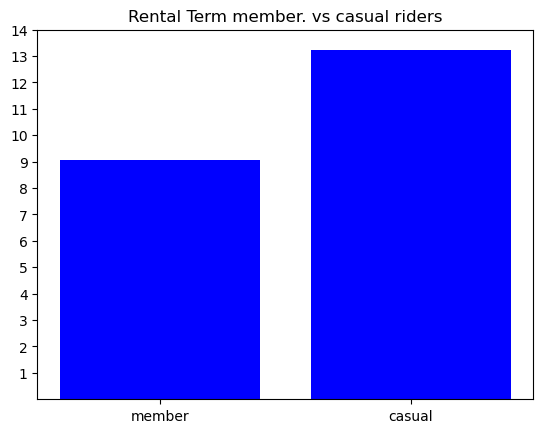

In [13]:
labels=['member','casual']
plt.title('Rental Term member. vs casual riders')
values=[9.07,13.22]


plt.bar(labels,values,color='blue')
plt.yticks(np.arange(1,15,1))
plt.show()


 ## we see that the casual rental term rides is longer in general

## why? 

The reason for this may be due to the fact that the subscribed members frequently use the company’s degrees in most of their movements, even if there navigation distance was not long. 
Because they are subscribers and they have already paid the money

This is on the assumption that the annual subscription has no limit, so the subscriber has the right to use the company’s bicycles however he wants, unlike non-subscribers who do not use them except when needed because he will pay another amount of money for each transportation.
This understanding is supported by: the uses of members are more than the uses of non-subscribers by 158%
  To make sure of this, we need to know the notables of the users for each rental, and this is not found in the data currently available


In [14]:
#number of member rides / number of casual rides
(370646/234181)*100

158.27330142069596

## secoundly lets take a look at the 'rideable_type' column, is there any difference between the casual and members in it ? 

In [126]:
cyclistics_df.groupby(['rideable_type','member_casual']).count()

ride_id  started_at  ended_at  \
rideable_type member_casual                                  
classic_bike  casual           92598       92598     92598   
              member          177297      177297    177297   
docked_bike   casual           13092       13092     13092   
electric_bike casual          128491      128491    128491   
              member          193349      193349    193349   

                             start_station_name  start_station_id  \
rideable_type member_casual                                         
classic_bike  casual                      92598             92598   
              member                     177297            177297   
docked_bike   casual                      13092             13092   
electric_bike casual                      93427             93427   
              member                     139173            139173   

                             end_station_name  end_station_id  start_lat  \
rideable_type member_casual                                                
classic_bike  casual                    92292           92292      92598   
              member                   177176          177176     177297   
docked_bike   casual                    12808           12808      13092   
electric_bike casual                    87312           87312     128491   
              member                   139972          139972     193349   

                             start_lng  end_lat  end_lng  start_hour  \
rideable_type member_casual                                            
classic_bike  casual             92598    92292    92292       92598   
              member            177297   177177   177177      177297   
docked_bike   casual             13092    12808    12808       13092   
electric_bike casual            128491   128491   128491      128491   
              member            193349   193349   193349      193349   

                             start_min  end_hour  end_min  tenancy  
rideable_type member_casual                                         
classic_bike  casual             92598     92598    92598    92598  
              member            177297    177297   177297   177297  
docked_bike   casual             13092     13092    13092    13092  
electric_bike casual            128491    128491   128491   128491  
              member            193349    193349   193349   193349

we could see that the casual riders are the only useres who used  (docked_bike)
and its only 5.5% of casual riders witch they are using it.

In [16]:
casual=234181
member=370646
classic_casual=  92598 
electric_casual= 128491 
classic_member= 177297 
electric_member= 193349
docked_casual= 13092


#percent:
classic_casual_percent= ( 92598 / casual) *100
electric_casual_percent= (128491 / casual) *100
classic_member_percent= (177297 / member) *100
electric_member_percent= (193349/ member) *100
docked_casual_percent= (13092/casual) *100


print(['classic_casual= ',classic_casual, 'electric_casual=',electric_casual,',','classic_member=',classic_member,',','electric_member=',electric_member, 'docked_casual=',docked_casual ])

['classic_casual= ', 92598, 'electric_casual=', 128491, ',', 'classic_member=', 177297, ',', 'electric_member=', 193349, 'docked_casual=', 13092]


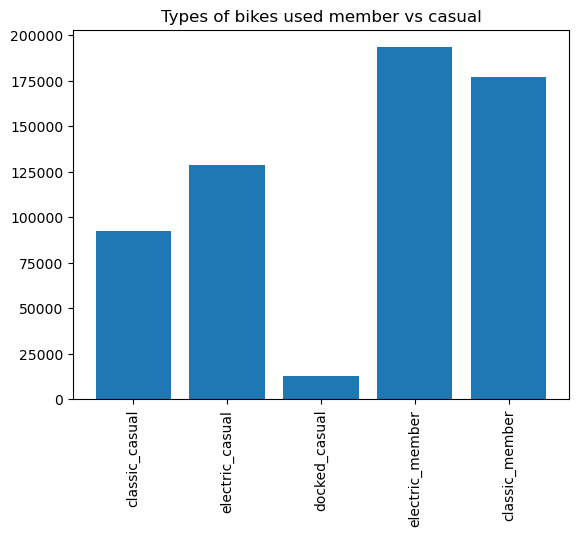

In [18]:
values2=[classic_casual,electric_casual,docked_casual,electric_member,classic_member]
labels2=['classic_casual','electric_casual','docked_casual','electric_member','classic_member']
plt.bar(labels2,values2)
plt.xticks(rotation='vertical')
plt.title('Types of bikes used member vs casual')

plt.show()

  #### we see that None of the members used docked bicycle, the mijorty of member and casual are using elictric/classic bikes

### Now, let's check if there is any difference between casual riders and members on which day of the month they ride.

In [19]:
#getting the starting date in datetime data type:
cyclistics_df['started_at']=pd.to_datetime(cyclistics_df['started_at'])

In [20]:
#gettin the day of month in a singel column:
cyclistics_df['day_of_month']=cyclistics_df['started_at'].dt.day

In [21]:
#now grouping by the day of month:
groupedby_dayOfMonth=cyclistics_df.groupby(['day_of_month','member_casual']).count()
groupedby_dayOfMonth=groupedby_dayOfMonth.reset_index()
groupedby_dayOfMonth.head()

,day_of_month,member_casual,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,start_hour,start_min,end_hour,end_min,rental_term
0,1,casual,1318,1318,1318,1318,1065,1065,1033,1033,1318,1318,1314,1314,1318,1318,1318,1318,1318
1,1,member,5513,5513,5513,5513,4648,4648,4641,4641,5513,5513,5511,5511,5513,5513,5513,5513,5513
2,2,casual,3060,3060,3060,3060,2599,2599,2515,2515,3060,3060,3054,3054,3060,3060,3060,3060,3060
3,2,member,9863,9863,9863,9863,8483,8483,8510,8510,9863,9863,9852,9852,9863,9863,9863,9863,9863
4,3,casual,3929,3929,3929,3929,3314,3314,3178,3178,3929,3929,3920,3920,3929,3929,3929,3929,3929


we could plot ot in a line chart to get a better underatanding of it

In [23]:
y=groupedby_dayOfMonth.loc[groupedby_dayOfMonth['member_casual']=='member']['ride_id']
z=groupedby_dayOfMonth.loc[groupedby_dayOfMonth['member_casual']=='casual']['ride_id']
x=np.arange(1,32,1)

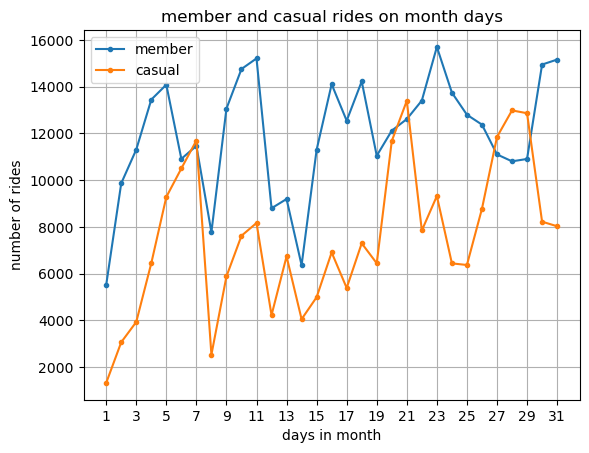

In [25]:
plt.plot(x,y,label='member',marker='.')
plt.plot(x,z,label='casual',marker='.')
plt.title('member and casual rides on month days')
plt.xticks(np.arange(1,32,2))
plt.xlabel('days in month')
plt.ylabel('number of rides')

plt.grid()
plt.legend()
plt.show()

 At the start of this month member and casual rides were very low


### Let's see if there is a difference in the use of bicycles on different days of the week?

In [49]:
# getting the dayofweek in a separated column
cyclistics_df['dayOfWeek']=cyclistics_df['started_at'].dt.dayofweek

cyclistics_df['started_at'].dt.dayofweek

0         6
1         5
2         6
3         2
4         1
         ..
604822    3
604823    2
604824    2
604825    3
604826    0
Name: started_at, Length: 604827, dtype: int64

In [137]:
#grouping by each dayofweek, then taking the number of rides
dayOfWeek=cyclistics_df.groupby(['dayOfWeek','member_casual']).count().reset_index()

dayOfWeek.loc[dayOfWeek['member_casual']=='member']['ride_id'].to_list()

[46302, 48896, 43322, 41243, 55686, 67680, 67517]

In [123]:
dayOfWeek_member=dayOfWeek.loc[dayOfWeek['member_casual']=='member']
dayOfWeek_casual=dayOfWeek.loc[dayOfWeek['member_casual']=='casual']


dayOfWeek_casual

,dayOfWeek,member_casual,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,day_of_month
0,Friday,casual,28712,28712,28712,28712,24260,24260,23344,23344,28712,28712,28634,28634,28712
2,Monday,casual,29541,29541,29541,29541,24998,24998,24236,24236,29541,29541,29469,29469,29541
4,Saturday,casual,40758,40758,40758,40758,34815,34815,33736,33736,40758,40758,40639,40639,40758
6,Sunday,casual,42124,42124,42124,42124,36261,36261,35418,35418,42124,42124,42019,42019,42124
8,Thursday,casual,28271,28271,28271,28271,24035,24035,23029,23029,28271,28271,28205,28205,28271
10,Tuesday,casual,33382,33382,33382,33382,28315,28315,27194,27194,33382,33382,33307,33307,33382
12,Wednesday,casual,31393,31393,31393,31393,26433,26433,25455,25455,31393,31393,31318,31318,31393


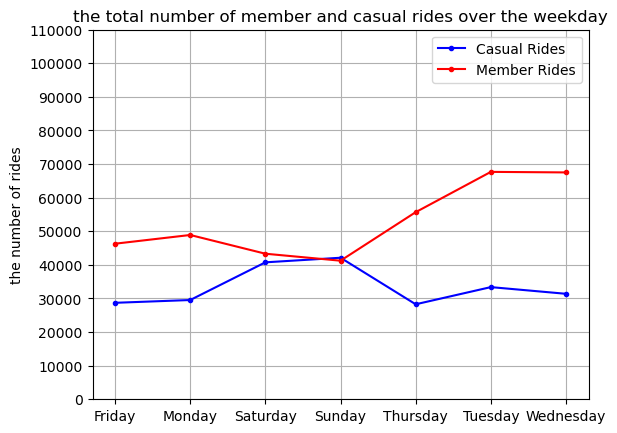

In [136]:
# monday=0
#day_in_week=['Monday', 'Tuesday', 'Wednesday',  'Thursday', 'Friday', 'Saturday', 'Sunday']

plt.plot(dayOfWeek_casual['dayOfWeek'],dayOfWeek_casual['ride_id'],marker='.',color='blue',label='Casual Rides')
plt.plot(dayOfWeek_member['dayOfWeek'],dayOfWeek_member['ride_id'],marker='.',color='red',label='Member Rides')

plt.yticks(np.arange(0,110001,10000))
plt.grid()
plt.legend()
plt.title('the total number of member and casual rides over the weekday')
plt.ylabel('the number of rides')
plt.show()

#It should be noted that this month the days are repeated (friday, saturday, thursday)4 times
#While the rest of the days were repeated 5 times
#so we should take the mean instead of the counts

In [158]:
#28721/4,29541/5,40758/4,42124/5,28271/4,33382/5,31393/5
dayOfWeek_casual['mean_dayOfWeek']=[28721//4,29541//5,40758//4,42124//5,28271//4,33382//5,31393//5]
dayOfWeek_member['mean_dayOfWeek']=[46302//4,48896//5,43322//4,41243//5,55686//4,67680//5,67517//5]

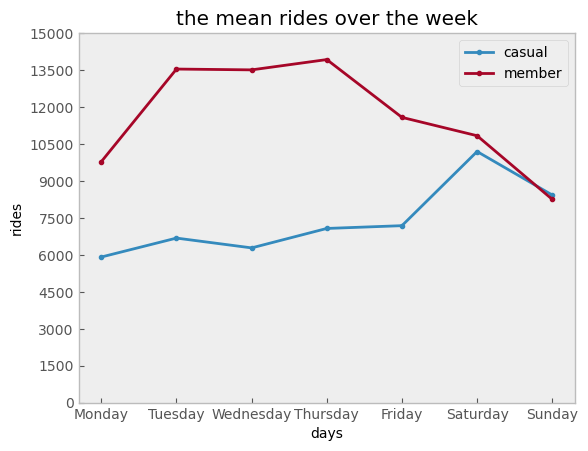

In [207]:
plt.style.use('bmh')
plt.plot(dayOfWeek_casual['dayOfWeek'].iloc[[1,5,6,4,0,2,3]],dayOfWeek_casual['mean_dayOfWeek'].iloc[[1,5,6,4,0,2,3]]
         ,label='casual',marker='.')
plt.plot(dayOfWeek_member['dayOfWeek'].iloc[[1,5,6,4,0,2,3]],dayOfWeek_member['mean_dayOfWeek'].iloc[[1,5,6,4,0,2,3]]
         ,label='member',marker='.')
plt.title('the mean rides over the week')
plt.xlabel('days')
plt.ylabel('rides')
plt.yticks(np.arange(0,15001,1500))
plt.grid()
plt.legend()
plt.show()


we see that we have a trend on saturday for casual riders and at the weekdays we see that we have a trend for members Unlike the casual member. 


## why is that?

so maybe we could say that members used cyclistics bikces for going back and forth from work

so how do annual members and casual riders use cyclistics bikes differently ?
we saw that member rides the shorter than casual rides, and